# <center> Raport lokalnego przewoźnika Wesoły Autobus S.A.
## <center> Analiza płynności firmy w zależności od ceny biletów i liczby zakupionych autobusów

<br>Zaawansowane Modelowanie Symulacyjne
<br>234060-0723

**Autorzy**
<br>Filip Mordarski, 76671 
<br>Damian Głowacki, 72384 
<br>Mateusz Dalba, 68734
<br>Dorota Szczęsna, 72569

In [1]:
import numpy as np
import numpy.random as random
import random as r
from collections import OrderedDict
import pandas as pd
from statistics import mean 
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stops = ["Małe Bobry", "Potok Górny", "Potok Dolny", "Dworzec", "Fabryka", 
           "Dworzec_2", "Potok Dolny_2", "Potok Górny_2", "Małe Bobry_2"]

In [3]:
sns.set_style('whitegrid')

In [4]:
# Nowa funkcja ceny - wybieramy tą
def f(cena=0):
    if cena <= 6:
        wspolczynnik = round(4/(1/2*cena+1)-1,3)
    else: 
        wspolczynnik = 0
    return wspolczynnik

In [5]:
def simulate_passengers(cena):
    passengers = {}
    for hour in range(24):
        passengers[hour] = {}
    for stop in stops:
        if stop != "Małe Bobry_2":
            wsp_ceny=f(cena)
            if stop == "Dworzec":
                number_passengers_in = random.gamma(6, 2, size=int(1200*wsp_ceny)).round(0)
                number_passengers_in = number_passengers_in[(number_passengers_in >=0) & \
                                                            (number_passengers_in <=23)]
                number_passengers_out = random.gamma(6, 2, size=int(1200*wsp_ceny)).round(0)
                number_passengers_out = number_passengers_out[(number_passengers_out >=0) & \
                                                              (number_passengers_out <=23)]
            elif '2' in stop:
                number_passengers_in = random.gamma(9, 1, size=int(400*wsp_ceny)).round(0).clip(0, 23)
                number_passengers_in = np.array([24-value for value in number_passengers_in])
                number_passengers_out = random.gamma(9, 1, size=int(800*wsp_ceny)).round(0).clip(0, 23)
                number_passengers_out = np.array([24-value for value in number_passengers_out])
            elif stop == "Fabryka": 
                number_passengers_in = random.gamma(8, 1, size=int(1200*wsp_ceny)).round(0).clip(0, 23)
                number_passengers_in = np.array([24-value for value in number_passengers_in])
            else: 
                number_passengers_in = random.gamma(9, 1, size=int(800*wsp_ceny)).round(0).clip(0, 23)
                number_passengers_out = random.gamma(9, 1, size=int(400*wsp_ceny)).round(0).clip(0, 23)
            for hour in range(24):
                passengers[hour][stop] = {}
                passengers[hour][stop]["in"] = len(number_passengers_in[number_passengers_in == hour])
                if stop not in ["Małe Bobry", "Małe Bobry_2", "Fabryka"]:
                    passengers[hour][stop]["out"] = len(number_passengers_out\
                                                              [number_passengers_out == hour])
    return passengers

## 1. Executive summary

## 2. Opis organizacji

<br> Symulacja jest przeprowadzana dla lokalnego przewoźnika Wesoły Autobus S.A. 

## 3. Opis problemu
<br>W związku ze wzrostem zatrudnienia w lokalnej fabryce firma planuje zoptymalizować istniejącą linię łączącą lokalne miejscowości z fabryką, głównym miejscem pracy większości mieszkańców. Obecnie istniejące połączenie jest nieefektywne, kursuje za mało autobusów i nie wszyscy pasażerowie są w stanie pojechać autobusem o zaplanowanej godzinie. Dodatkowo zyski firmy są na zbyt niskim poziomie, aby firma mogła dobrze prosperować i inwestować w dalszy rozwój.

Prezes firmy Wesoły Autobus S.A. zwrócił się do nas z prośbą o przygotowanie raportu z rekomendacjami na usprawnienie linii łączącej Małe Bobry z fabryką. Autobus dojeżdzając do przystanku "Fabryka" robi pętlę, to znaczy wraca tą samą trasą, odwiedzając te same przystanki. W zależności od pory dnia oraz przystanka liczba pasażerów jest inna. Prezes firmy przekazał nam informacje, jak wygląda średnia liczba pasażerów wsiadających oraz wysiadających na danym przystanku z uwzględnieniem godziny kursu. Według naszej analizy liczba pasażerów na przystankach przyjmuje rozkład gamma. Gdzie wartości wylosowane z tego rozkładu (zaokrąglone do zerowego miejsca po przecinku) są godzinami odjazdu bądź przyjazdu pasażerów. Zgodnie z wynikami naszych analiz liczby pasażerów na danych przystankach przyjęliśmy następujące rozkłady gamma:


#### Godziny **wsiadania** pasażerów na przystanku
- **Małe Bobry** przyjmują rozkład gamma z parametrem kształtu równym **9** oraz parametrem skali równym **1**
  <br>Sumaryczna liczba pasażerów wsiadających na tym przystanku w ciągu dnia wynosi **800**
- **Potok** Górny przyjmują rozkład gamma z parametrem kształtu równym **9** oraz parametrem skali równym **1**
  <br>Sumaryczna liczba pasażerów wsiadających na tym przystanku w ciągu dnia wynosi **800**
- **Potok Dolny** przyjmują rozkład gamma z parametrem kształtu równym **9** oraz parametrem skali równym **1**
  <br>Sumaryczna liczba pasażerów wsiadających na tym przystanku w ciągu dnia wynosi **800**
- **Dworzec** przyjmują rozkład gamma z parametrem kształtu równym **6** oraz parametrem skali równym **2**
  <br>Sumaryczna liczba pasażerów wsiadających na tym przystanku w ciągu dnia wynosi **1200**
- **Fabryka** przyjmują rozkład gamma z parametrem kształtu równym **8** oraz parametrem skali równym **1**
  <br>Sumaryczna liczba pasażerów wsiadających na tym przystanku w ciągu dnia wynosi **1200**
- **Dworzec_2** przyjmują rozkład gamma z parametrem kształtu równym **9** oraz parametrem skali równym **1**
   <br>Sumaryczna liczba pasażerów wsiadających na tym przystanku w ciągu dnia wynosi **400**
- **Potok Dolny_2** przyjmują rozkład gamma z parametrem kształtu równym **9** oraz parametrem skali równym **1**
    <br>Sumaryczna liczba pasażerów wsiadających na tym przystanku w ciągu dnia wynosi **400**
- **Potok Górny_2** przyjmują rozkład gamma z parametrem kształtu równym **9** oraz parametrem skali równym **1**
    <br>Sumaryczna liczba pasażerów wsiadających na tym przystanku w ciągu dnia wynosi **400**

**Uwaga**: przystanki z dopiskiem "2" oznaczają przystanki, które napotyka bus jadąc z powrotem z Fabryki do przystanku Małe Bobry. Dla tych przystanków od wylosowanych wartości została odjęta liczba 24, aby zwiększyć liczbę pasażerów wracających w godzinach popołudniowych z pracy do domu.

#### Godziny **wysiadania** pasażerów na przystankach 
Parametry rozkładów gamma dla pasażerów wysiadających na poszczególnych przystankach jest taka sama jak dla pasażerów wsiadających. Różnica jest natomiast w sumarycznej liczbie pasażerów, którą przedstawiono poniżej dla każdego przystanku.

- **Małe Bobry** Sumaryczna liczba pasażerów wysiadających na tym przystanku w ciągu dnia wynosi **400**
- **Potok** Sumaryczna liczba pasażerów wysiadających na tym przystanku w ciągu dnia wynosi **400**
- **Potok Dolny** Sumaryczna liczba pasażerów wysiadających na tym przystanku w ciągu dnia wynosi **400**
- **Dworzec** Sumaryczna liczba pasażerów wysiadających na tym przystanku w ciągu dnia wynosi **1200**
- **Dworzec_2** Sumaryczna liczba pasażerów wysiadających na tym przystanku w ciągu dnia wynosi **800**
- **Potok Dolny_2** Sumaryczna liczba pasażerów wysiadających na tym przystanku w ciągu dnia wynosi **800**
- **Potok Górny_2** Sumaryczna liczba pasażerów wysiadających na tym przystanku w ciągu dnia wynosi **800**

**Uwaga**: Dla przystanku "Fabryka" nie były losowane godziny wysiadania pasażerów, ponieważ zakładamy, że wysiadają tam wszyscy jadący danym busem pasażerowie.

Poniżej przedstawiono na dwóch wykresach liczbę pasażerów wsiadających oraz wysiadających na konkretnym przystanku o danej godzinie.

Klienci także są wrażliwi na wartość ceny biletu, jeżeli cena będzie za wysoka to pojadą do pracy samochodami, pociągiem lub taksówkami. Z tego względu liczba pasażerów w ciągu dnia na danym przystanku jest uzależniona od ceny biletu. Powyższe wartości liczby pasażerów na danych przystankach odzwierciedlają sytuację gdy cena biletu wynosi 2 zł. Wraz ze zmianą ceny, zmienia się współczynnik, który wpływa na liczbę pasażerów na danym przystanku w ciągu dnia. Współczynnik jest obliczany za pomocą następującej funkcji jeśli cena jest mniejsza bądź równa 6: $f(x) = \frac{4}{0,5x+1}-1$, gdzie x to cena biletu. Jeśli cena jest większa od 6, współczynnik jest równy 0, co oznacza, że nie ma popytu na usługi transportowe naszej firmy. Poniższy wykres przedstawia przebieg funkcji, odpowiedzialnej za obliczenie współczynnika.

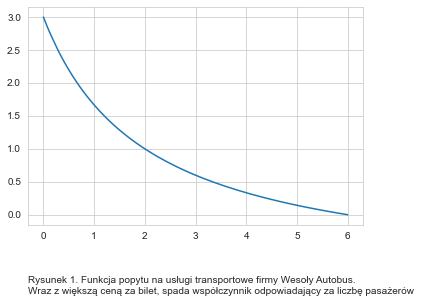

In [6]:
x = np.linspace(0,6,10000)
y = [f(value) for value in x]
plt.plot(x, y)
plt.text(-0.3, -1.2, "Rysunek 1. Funkcja popytu na usługi transportowe firmy Wesoły Autobus.\n"
                     "Wraz z większą ceną za bilet, spada współczynnik odpowiadający za liczbę pasażerów", ha='left');

Na poniższym wykresie możemy zaobserwować jak zmienia się liczba pasażerów wsiadających na wszystkich przystankach w zależności od godziny kursu.

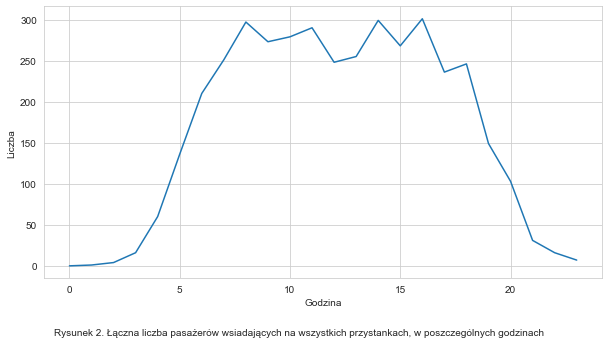

In [7]:
# Łaczna liczba pasażerów wsiadających
cena_biletu=2.8
lista_h = list(range(0,24))
lista_pass = []
pass_l = 0
for key,value in simulate_passengers(cena_biletu).items():
    pass_l = 0
    for k, v in value.items():
        pass_l += (v['in'])
    lista_pass.append(pass_l)
df = pd.DataFrame({'Godzina': lista_h, 'Liczba': lista_pass} )
fig, ax = plt.subplots(figsize=(10,5)) 
sns.lineplot(data=df,x='Godzina',y='Liczba')
plt.text(-.7, -84,'Rysunek 2. Łączna liczba pasażerów wsiadających na wszystkich przystankach, w poszczególnych godzinach');

Na poniższym wykresie możemy zaobserwować jak zmienia się liczba pasażerów wysiadających na wszystkich przystankach w zależności od godziny kursu.

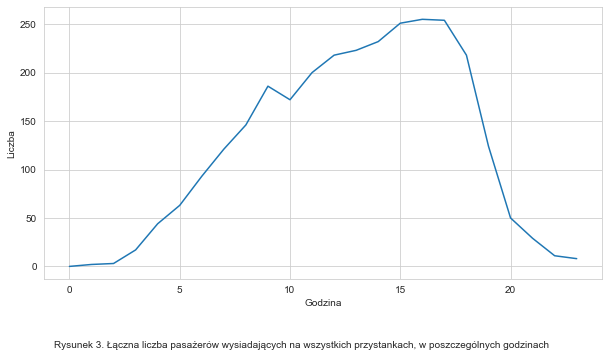

In [11]:
# Łaczna liczba pasażerów wysiadających

lista_h = list(range(0,24))
lista_pass_out = []
pass_l = 0
for key2,value2 in simulate_passengers(cena_biletu).items():
    pass_l = 0
    for k2, v2 in value2.items():
        if 'out' not in v2:
            pass_l += 0
        else:
            pass_l += v2['out']
    lista_pass_out.append(pass_l)
df = pd.DataFrame({'Godzina': lista_h, 'Liczba': lista_pass_out} )
fig, ax = plt.subplots(figsize=(10,5)) 
sns.lineplot(data=df,x='Godzina',y='Liczba')
plt.text(-.7, -84, 'Rysunek 3. Łączna liczba pasażerów wysiadających na wszystkich przystankach, w poszczególnych godzinach');

Poniższy wykres przedstawia zależność liczby wsiadających pasażerów a godziną kursu w podziale na przystanki.

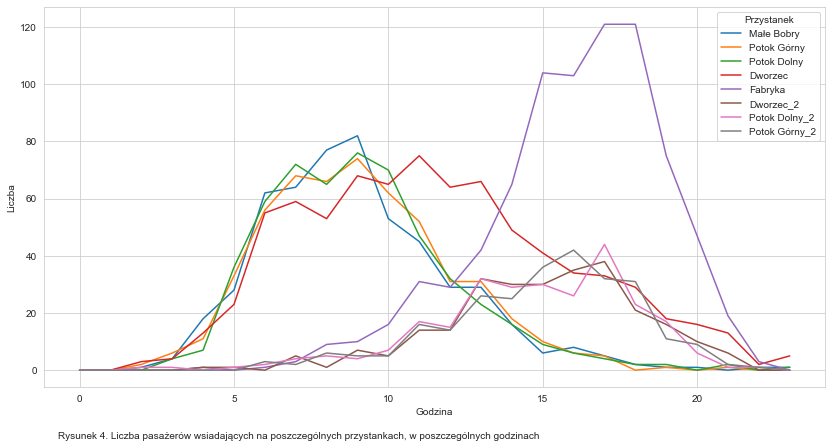

In [18]:
lista_h = []
for h in range(0,24):
    lista = [h]*8
    lista_h += lista
stops = []
for i in range(0,24):
    s = ["Małe Bobry", "Potok Górny", "Potok Dolny", "Dworzec", "Fabryka", 
           "Dworzec_2", "Potok Dolny_2", "Potok Górny_2"]
    stops += s
lista_pass = []
for key,value in simulate_passengers(cena_biletu).items():
    for k, v in value.items():
        lista_pass.append(v['in'])
df = pd.DataFrame({'Godzina': lista_h, 'Przystanek': stops, 'Liczba': lista_pass} )
fig, ax = plt.subplots(figsize=(14,7)) 
sns.lineplot(data=df,x='Godzina',y='Liczba',hue='Przystanek')
plt.text(-.7, -24, 'Rysunek 4. Liczba pasażerów wsiadających na poszczególnych przystankach, w poszczególnych godzinach');

Poniższy wykres przedstawia zależność liczby wysiadających pasażerów a godziną kursu w podziale na przystanki.

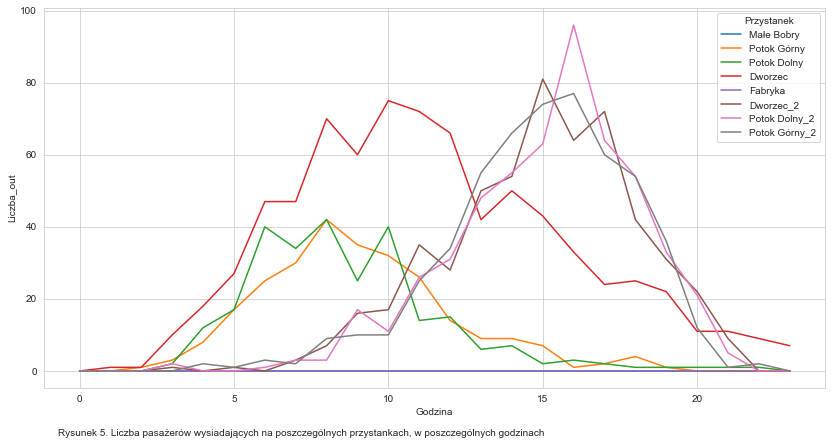

In [13]:
lista_h = []
for h in range(0,24):
    lista = [h]*8
    lista_h += lista
stops = []

for i in range(0,24):
    s = ["Małe Bobry", "Potok Górny", "Potok Dolny", "Dworzec", "Fabryka", 
           "Dworzec_2", "Potok Dolny_2", "Potok Górny_2"]
    stops += s
        
lista_pass_out = []
for key2,value2 in simulate_passengers(cena_biletu).items():
    for k2, v2 in value2.items():
        if 'out' not in v2:
            lista_pass_out.append(0)
        else:
            lista_pass_out.append(v2['out'])
df = pd.DataFrame({'Godzina': lista_h, 'Przystanek': stops, 'Liczba_out': lista_pass_out} )

fig, ax = plt.subplots(figsize=(14,7)) 
sns.lineplot(data=df,x='Godzina',y='Liczba_out',hue='Przystanek')
plt.text(-.7, -18, 'Rysunek 5. Liczba pasażerów wysiadających na poszczególnych przystankach, w poszczególnych godzinach');

In [6]:
def random_times(n, num_terms = None):
    output = []
    mean = n/num_terms
    for time in range(num_terms):
        if time+1 == num_terms:
            output.append(n - sum(output))
        else:
            output.append(round(random.normal(mean, mean*0.1), 0))
    return output

In [7]:
def model(hour, stats, buses, capacity):
    # filtruje słownik z liczbą pasażerów (na daną godzine)
    stats_hour = stats[hour]
    # inicjuję potrzebne słowniki
    stats_stops = {}
    bus_passengers = {}
    for bus in range(buses):
        bus_passengers[bus+1] = {}
        bus_passengers[bus+1]['in'] = []
        bus_passengers[bus+1]['out'] = []
    # tworzę tuplę z listami wsiadających oraz wysiadających pasażerów z danego busa
    # długość list = liczba busów
    for key, value in stats_hour.items():
        if 'out' in value:
            stats_stops[key] = (random_times(value['in'], buses), random_times(value['out'], buses))
        else:
            stats_stops[key] = (random_times(value['in'], buses),)
    # inicjuję finalną listę z przewiezionymi pasażerami przez konkretne busy
    bus_output = []
    bus_outputall = []
    for bus in range(buses):
        # liczba aktualnych pasażerów w busie
        passengers = 0
        # liczba w sumie przewiezionych pasażerów
        passengers_final = 0
        passengers_all=0
        for key, value in stats_stops.items():
            bus_passengers[bus+1]['in'].append(value[0][bus])
            if len(value) > 1:
                bus_passengers[bus+1]['out'].append(value[1][bus])
            else:
                bus_passengers[bus+1]['out'].append(0)
        for i in range(len(bus_passengers[bus+1]['in'])):
            # i == 4 to rondo onz, zakładamy, że na rondzie ONZ wysiądą wszyscy
            if i == 4:
                passengers = 0
            else:
                passengers -= min(bus_passengers[bus+1]['out'][i], passengers)
            passengers_all+=bus_passengers[bus+1]['in'][i]
            passengers_final += min(capacity-passengers, bus_passengers[bus+1]['in'][i])
            passengers += min(capacity-passengers, bus_passengers[bus+1]['in'][i])
        bus_output.append(passengers_final)
        bus_outputall.append(passengers_all)
    return  bus_output,bus_outputall

In [8]:
# Symulacja z arbitralnymi wartościami

def symulacja_init(iteration, cena_biletu, koszt_autobusu, list_buses, capacity):
    profits = []
    for i in range(iteration):
        random.seed(i)
        r.seed(i)
        profit = 0
        stats = simulate_passengers()
        for hour in range(24):
            passengers = model(hour, stats, list_buses[hour], capacity)[0]
            profit += sum([value*cena_biletu for value in passengers])
            profit -= koszt_autobusu*list_buses[hour]
        profits.append(profit)
    return profits

In [94]:
def symulacja(iteration, cena_biletu, koszt_autobusu, buses, capacity):
    profits = []
    optimum_buses = []
    for i in range(iteration):
        random.seed(i)
        r.seed(i)
        profit = 0
        hour_bus = []
        stats = simulate_passengers(cena_biletu)
        hour_profits = []
        for hour in range(24):
            bus_profits = []
            for bus in range(1, buses+1):
                profit = 0
                passengers = model(hour, stats, bus, capacity)[0]
                profit += sum([value*cena_biletu for value in passengers])
                profit -= koszt_autobusu*bus
                bus_profits.append(profit)
            hour_bus.append(bus_profits.index(max(bus_profits))+1)
            hour_profits.append(max(bus_profits))
        profits.append(sum(hour_profits))
        optimum_buses.append(hour_bus)
    return profits ,optimum_buses, hour_profits

In [95]:
### Kod zmieniony żeby obliczyć ile pasażerów tracimy
#wstawiłam jako drugą symulację bo nie chciałam, żeby trzeba było w dalszych kodach coś zmieniać
def symulacja2(iteration, cena_biletu, koszt_autobusu, buses, capacity):
    profits = []
    optimum_buses = []
    passengers_taken=[]
    passengers_all=[]
    for i in range(iteration):
        random.seed(i)
        r.seed(i)
        profit = 0
        passengerstaken=0
        passengersall=0
        hour_bus = []
        stats = simulate_passengers(cena_biletu)
        hour_profits = []
        for hour in range(24):
            bus_profits = []
            for bus in range(1, buses+1):
                profit = 0
                passengers = model(hour, stats, bus, capacity)[0]
                passengers2=model(hour, stats, bus, capacity)[1]
                profit += sum([value*cena_biletu for value in passengers])
                profit -= koszt_autobusu*bus
                bus_profits.append(profit)
            hour_bus.append(bus_profits.index(max(bus_profits))+1)
            hour_profits.append(max(bus_profits))
            passengerstaken += sum([value for value in passengers])
            passengersall+= sum([value for value in passengers2])
        profits.append(profit)
        optimum_buses.append(hour_bus)
        passengers_all.append(passengersall)
        passengers_taken.append(passengerstaken)
    return passengers_all,passengers_taken

In [96]:
iteration=10
ceny =2
koszt_autobusu=50
buses=range(1,7,1)
capacity=40
data4 = pd.DataFrame()

for b in buses:
    data4 = data4.append({"Dopuszczone busy": b, 
                "Liczba wszystkich pasażerów": sum(symulacja2(iteration, ceny, koszt_autobusu, b, capacity)[0]),
               "Liczba przewiezionych pasażerów": sum(symulacja2(iteration, ceny, koszt_autobusu, b, capacity)[1])}, ignore_index=True)




In [97]:
data4["Liczba straconych pasażerów"]=data4["Liczba wszystkich pasażerów"]-data4["Liczba przewiezionych pasażerów"]

In [98]:
data4

,Dopuszczone busy,Liczba przewiezionych pasażerów,Liczba wszystkich pasażerów,Liczba straconych pasażerów
0,1.0,34303.0,59725.0,25422.0
1,2.0,47242.0,59725.0,12483.0
2,3.0,53226.0,59725.0,6499.0
3,4.0,56800.0,59725.0,2925.0
4,5.0,58762.0,59725.0,963.0
5,6.0,59514.0,59725.0,211.0


Obecnie na trasie jeżdżą maksymlanie 3 busy przy cenie biletu 2 zł. Analizując powyższą tabelę widzimy, że przy takim układzie wiele pasażerów nie jest w stanie wsiąść do autobusów, przez co firma traci potencjalne zyski. W dalszej szczęści raportu zostanie określony optymalny poziom ceny oraz liczba busów aby zmaksymalizować zysk oraz liczba straconych klientów była jak najmniejsza

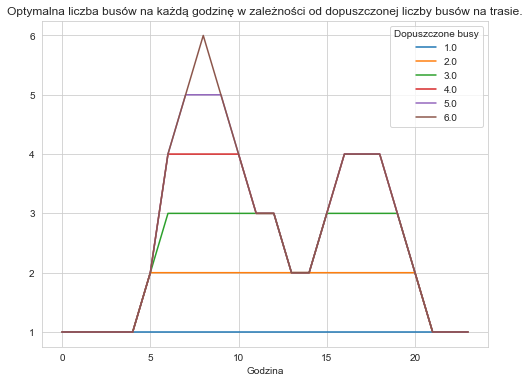

In [99]:
### Nieoptymalna liczba busów na daną godzinę dla zadanej ceny biletu
iteration=15
cena_biletu =2
koszt_autobusu=50
buses=6
capacity=40

def symulacja3(iteration, cena_biletu, koszt_autobusu, buses, capacity):
    data = pd.DataFrame()
    profits = []
    optimum_buses = []
    for i in range(iteration):
        random.seed(i)
        r.seed(i)
        profit = 0
        hour_bus = []
        stats = simulate_passengers(cena_biletu)
        hour_profits = []
        for hour in range(24):
            bus_profits = []
            for bus in range(1, buses+1):
                profit = 0
                passengers = model(hour, stats, bus, capacity)[0]
                profit += sum([value*cena_biletu for value in passengers])
                profit -= koszt_autobusu*bus
                bus_profits.append(profit)
                data = data.append({"Dopuszczone busy": bus, "Godzina":hour,
            "liczba busów":bus_profits.index(max(bus_profits))+1 }, ignore_index=True)
            hour_bus.append(bus_profits.index(max(bus_profits))+1)
            hour_profits.append(max(bus_profits))
        profits.append(sum(hour_profits))
        optimum_buses.append(hour_bus)
    return data

symulacja3(iteration, cena_biletu, koszt_autobusu, buses, capacity).groupby(['Godzina','Dopuszczone busy'])['liczba busów'].median().round(0).unstack(1).plot.line(figsize=(8, 6),title="Optymalna liczba busów na każdą godzinę w zależności od dopuszczonej liczby busów na trasie.")


## 5. Wyniki analizy

<br> W tej części raportu zostaną przedstawione wyniki analizy, które mają na celu wskazać optymalną liczbę autobusów na każdą godzinę dnia oraz cenę biletu.

### 5.1 Wybór optymalnej liczby autobusów dla każdej godziny
<br> Liczba pasażerów w danych godzinach nie jest stała i zależy od pory dnia. Dlatego ustalenie stałej liczby autobusów kursujących w każdej godzinie jest nieoptymalne. Poniżej przeprowadzono analizę optymalnej liczby autobusów dla danej godziny w zależności od ceny biletu i liczby dopuszczonych autobsuów (maksymalnie 6).

In [100]:
### Symulacja optymalnej liczby busów od ceny biletu, liczby busów i godziny
iteration=15
cena_biletu =np.arange(0, 4.2,0.2)
koszt_autobusu=50
buses=6
capacity=40

def symulacja4(iteration, cena_biletu, koszt_autobusu, buses, capacity):
    data1 = pd.DataFrame()
    profits = []
    optimum_buses = []
    for i in range(iteration):
        for p in cena_biletu:
            random.seed(i)
            r.seed(i)
            profit = 0
            hour_bus = []
            stats = simulate_passengers(p)
            hour_profits = []
            for hour in range(24):
                bus_profits = []
                for bus in range(1, buses+1):
                    profit = 0
                    passengers = model(hour, stats, bus, capacity)[0]
                    profit += sum([value*p for value in passengers])
                    profit -= koszt_autobusu*bus
                    bus_profits.append(profit)
                    data1 = data1.append({"Cena":p,"Dopuszczone busy": bus, "Godzina":hour,
                "liczba busów":bus_profits.index(max(bus_profits))+1 }, ignore_index=True)
                hour_bus.append(bus_profits.index(max(bus_profits))+1)
                hour_profits.append(max(bus_profits))
            profits.append(sum(hour_profits))
            optimum_buses.append(hour_bus)
    return data1

data1=symulacja4(iteration, cena_biletu, koszt_autobusu, buses, capacity).groupby(['Dopuszczone busy','Cena','Godzina'])['liczba busów'].median().round(0).reset_index()


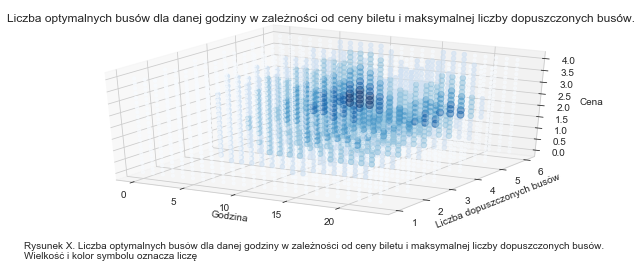

In [101]:
x_line=data1['Godzina']
y_line=data1['Dopuszczone busy']
z_line=data1['Cena']
l_b=data1['liczba busów']*10

fig = plt.figure(
    figsize=plt.figaspect(0.4)
)
ax = fig.add_subplot(1,1,1, projection='3d')
scat1=ax.scatter3D(x_line, y_line, z_line, 'gray', s=l_b,c=l_b, marker='o',cmap = cm.Blues)

ax.set_xlabel("Godzina")
ax.set_ylabel("Liczba dopuszczonych busów")
ax.set_zlabel("Cena")
ax.set_title("Liczba optymalnych busów dla danej godziny w zależności od ceny biletu i maksymalnej liczby dopuszczonych busów.",size=12)
fig.text(.1, -0.02, "Rysunek X. Liczba optymalnych busów dla danej godziny w zależności od ceny biletu i maksymalnej liczby dopuszczonych busów. \n"
                     "Wielkość i kolor symbolu oznacza liczę  \n", ha='left')
plt.show()

Analiza powyższego wykresu pozwala zauważyć, że w godzinach porannych oraz nocnych potrzeba jedynie jednego autobusu na trasie. Dodatkowo widzimy, że wraz ze wzrostem liczby dopuszczonej liczby busów na trasie wzrasta ich optymalna liczba w godzinach szczytowych. Oczywiście dla wyższych wartości ceny biletu, tak od 3,5 zł, liczba optymalnych autobusów zaczyna spadać, ponieważ klienci rezygnują. Poniższy wykres przedstawia dokładną liczbę optymalnych busów w ciągu dla optymalnej wartości biletu - 2,8 zł. Widzimy, że w godzinach dojazdu i powrótu z pracy potrzeba najwięcej kursujących autobusów, czyli 4 na godzinę, w ciągu dnia liczba ta spada do 3 na godzinę.

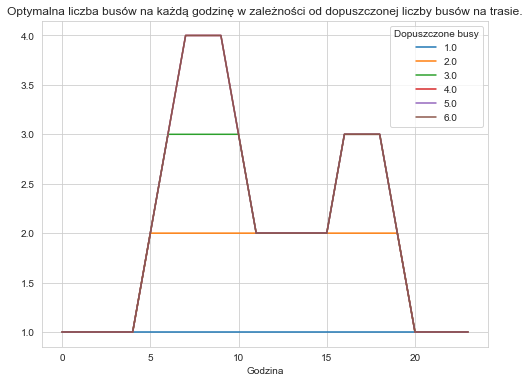

In [102]:
### Symulacja optymalnej liczby busów przy zadanej cenie biletu, koszcie i capacity
iteration=15
cena_biletu =2.8
koszt_autobusu=50
buses=6
capacity=40

def symulacja5(iteration, cena_biletu, koszt_autobusu, buses, capacity):
    data = pd.DataFrame()
    profits = []
    optimum_buses = []
    for i in range(iteration):
        random.seed(i)
        r.seed(i)
        profit = 0
        hour_bus = []
        stats = simulate_passengers(cena_biletu)
        hour_profits = []
        for hour in range(24):
            bus_profits = []
            for bus in range(1, buses+1):
                profit = 0
                passengers = model(hour, stats, bus, capacity)[0]
                profit += sum([value*cena_biletu for value in passengers])
                profit -= koszt_autobusu*bus
                bus_profits.append(profit)
                data = data.append({"Dopuszczone busy": bus, "Godzina":hour,
            "liczba busów":bus_profits.index(max(bus_profits))+1 }, ignore_index=True)
            hour_bus.append(bus_profits.index(max(bus_profits))+1)
            hour_profits.append(max(bus_profits))
        profits.append(sum(hour_profits))
        optimum_buses.append(hour_bus)
    return data

symulacja5(iteration, cena_biletu, koszt_autobusu, buses, capacity).groupby(['Godzina','Dopuszczone busy'])['liczba busów'].median().round(0).unstack(1).plot.line(figsize=(8, 6),title="Optymalna liczba busów na każdą godzinę w zależności od dopuszczonej liczby busów na trasie.")


Poniższa tabela przedstawia liczbę optymalnych busów dla każdej godzinie.

In [90]:
df=symulacja(iteration, cena_biletu, koszt_autobusu, buses, capacity)
df=df[df["Dopuszczone busy"]==6]
df.groupby(['Godzina','Dopuszczone busy','liczba busów'])['liczba busów'].count()


Godzina  Dopuszczone busy  liczba busów
0.0      6.0               1.0             15
1.0      6.0               1.0             15
2.0      6.0               1.0             15
3.0      6.0               1.0             15
4.0      6.0               1.0             15
5.0      6.0               1.0              1
                           2.0             13
                           3.0              1
6.0      6.0               2.0              1
                           3.0             14
7.0      6.0               3.0              6
                           4.0              9
8.0      6.0               3.0              4
                           4.0              9
                           5.0              2
9.0      6.0               3.0              4
                           4.0             10
                           5.0              1
10.0     6.0               2.0              1
                           3.0             10
                           4.0          

### 5.2 Wybór optymalnej ceny w zależności od zysku i typu busa
<br>Poniżej przeprowadzono analizę zysku w zależności od ceny biletu oraz liczby dopuszczonych autobusów na trasie dla przyjętego kosztu przejazdu atobusu równego 50 zł oraz pojemności jednego busa 40 osób. Największy zysk firma wypracuje jeśli przyjmie cenę biletu na poziomie 2,6-2,8 zł. Firmie nie opłaca się wysyłać na trasę wiecej niż 4 autobusy na godzinę, ponieważ nie generuje to większych zysków.

In [103]:
### Symulacja zysku od ceny i liczby busów
iteration=10
ceny =np.arange(0.0, 4.2,0.2).round(1)
koszt_autobusu=50
buses=range(1,7,1)
capacity=40
data2 = pd.DataFrame()

for p in ceny:
    for b in buses:
        data2 = data2.append({"Cena":p, "Dopuszczone busy": b, 
                            "Zysk": mean(symulacja(iteration, p, koszt_autobusu, b, capacity)[0])}, ignore_index=True)



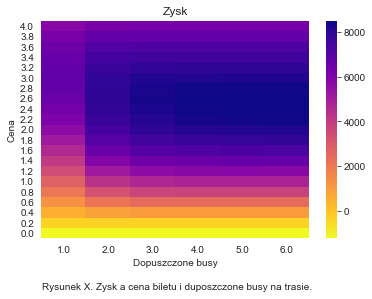

In [104]:
test_pivoted=data2.pivot("Cena","Dopuszczone busy","Zysk")
ax=sns.heatmap(test_pivoted, cmap=cm.plasma_r)
ax.invert_yaxis()
ax.set_title('Zysk')
ax.text(0.01, -5, "Rysunek X. Zysk a cena biletu i duposzczone busy na trasie.", ha='left')
plt.show()

Firma posiada we flocie 4 typy autobusów. Prezes zastanawia się jakiej wielkości busy powinny jeździć na trasie.

In [106]:
### Symulacja zysku w zależności od ceny biletu, pojemności busa i kosztu busa 
iteration=10
ceny =np.arange(1, 4.2,0.2).round(1)
koszt_autobusu=[80,90,110,130]
buses=4
capacity=[30,40,50,60]
data6 = pd.DataFrame()
for p in ceny:
    for i in range(len(capacity)):
            data6 = data6.append({"Cena":p, "Pojemność busa": capacity[i], "Typ busa": str(capacity[i])+" osób"+" - "+str(koszt_autobusu[i])+" zł",
                                "Zysk": mean(symulacja(iteration, p, koszt_autobusu[i], buses, capacity[i])[0])}, ignore_index=True)

Text(0,1,'Zysk w zależności od ceny biletu i rodzaju busa')

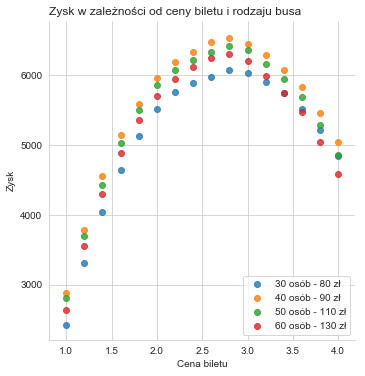

In [107]:
sns.lmplot( x="Cena", y="Zysk", data=data6, fit_reg=False, hue="Typ busa", legend=False)
plt.legend(loc='lower right')
plt.xlabel('Cena biletu')
plt.ylabel('Zysk')
plt.title('Zysk w zależności od ceny biletu i rodzaju busa', loc='left')


## 6. Analiza wrażliwości

<br> W tej części raportu zostanie przeprowadzona analiza skutków zmiany wybranych kluczowych parametrów. Pomoże to odpowiedzieć na pytanie, jak zmiana parametrów wpłynie na rozwiązanie optymalne.

### 6.1 Analiza wpływu ilości symulacji - Mateusz

W celu zbadania wpływu iteracji na średni zysk firmy, początkowo przeprowadzono symulację przy założeniu stałych parametrów. Maksymalna liczba symulacji = 90. Cena biletu 2.8 PLN. Koszt przejazdu autobusu 50 PLN. Pojemność jednego autobusu - 40 pasażerów.

In [24]:
# Nowa funkcja ceny - wybieramy tą
def f(cena=0):
    if cena <= 6:
        wspolczynnik = round(4/(1/2*cena+1)-1,3)
    else: 
        wspolczynnik = 0
    return wspolczynnik

In [84]:
def symulacja3(iteration, cena_biletu, koszt_autobusu, buses, capacity):
    df = pd.DataFrame()
    profits = []
    optimum_buses = []
    for i in range(iteration):
        random.seed(i)
        r.seed(i)
        profit = 0
        hour_bus = []
        stats = simulate_passengers(cena_biletu)
        for hour in range(24):
            hour_profit = []
            for bus in range(1, buses+1):
                passengers = model(hour, stats, bus, capacity)[0]
                profit += sum([value*cena_biletu for value in passengers])
                profit -= koszt_autobusu*bus
                hour_profit.append(profit)
            hour_bus.append(hour_profit.index(max(hour_profit))+1)
            profit = max(hour_profit)
        profits.append(profit)
        optimum_buses.append(hour_bus)
        
        df = df.append({'Zysk': profit, 'Iteracja': i, 'Liczba autobusów': buses}, ignore_index=True)
        
    return df

In [93]:
iterations = range(10,100,10)
#cena = [2.6,2.8]
df = pd.DataFrame()
średni_zysk = []
#cenx = []
liczba_iteracji = []
buses = [3,4]
list_bus = []
for i in iterations:
    for b in buses:
        print(i)
        x = symulacja3(i, 2.8, 200, b, 40)
        #cenx.append(p)
        list_bus.append(b)
        liczba_iteracji.append(i)
        średni_zysk.append(x['Zysk'].mean())

10
10
20
20
30
30
40
40
50
50
60
60
70
70
80
80
90
90


In [94]:
df_1 = pd.concat([pd.Series(średni_zysk),pd.Series(list(liczba_iteracji)),pd.Series(list(list_bus))],axis=1).rename(columns={0:'Średni zysk',1:'Liczba Iteracji',2:'Liczba autobusów'})

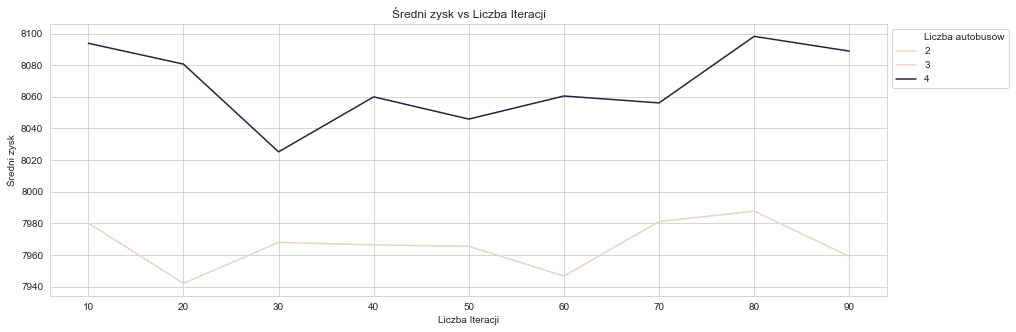

In [98]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_1,x='Liczba Iteracji',y='Średni zysk',hue='Liczba autobusów')
plt.title('Średni zysk vs Liczba Iteracji')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Z analizy wynika, ze wraz ze wzrostem liczby symulacji średni zysk stabilizuje się. Dla 4 autobusów zysk jest zawsze wyższy niż dla układu z 3 autobusami.

W dalszym kroku przeprowadzono analizę wartości odchylenia standardowego zysku w zależności od liczby powtórzeń symulacji. Maksymalna liczba iteracji = 190. Przyjęto przy tym stały koszt biletu na poziomie 2.8 zł, koszt przejazdu autobusu kształtujący się na poziomie 200 zł oraz liczbę wypuszczanych autobusów = 4 oraz pojemność autobusu = 40.

In [108]:
iterations = range(10,200,10)
df = pd.DataFrame()
średni_zysk = []
liczba_iteracji = []
odchylenie = []
for i in iterations:
    print(i)
    x = symulacja(i, 2.8, 200, 4, 40)
    liczba_iteracji.append(i)
    średni_zysk.append(x['Zysk'].mean())
    odchylenie.append(np.std(x['Zysk']))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


In [109]:
df_2 = pd.concat([pd.Series(średni_zysk),pd.Series(list(liczba_iteracji)),pd.Series(list(odchylenie))],axis=1).rename(columns={0:'Średni zysk',1:'Liczba Iteracji',2:'Odchylenie standardowe'})

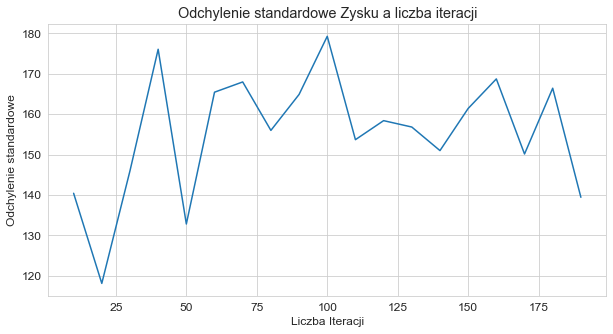

In [114]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,5))
sns.lineplot(data=df_2,x='Liczba Iteracji',y='Odchylenie standardowe')
plt.title('Odchylenie standardowe Zysku a liczba iteracji')
plt.show()

Na powyższym wykresie widać, że wraz z wzrostem liczby iteracji odchylenie standardowe zysku się stabilizuje na poziomie oscylującym między 150 a 170 zł.

#### 6.3 Analiza zmiany ceny biletu, liczby maksymalnych autobusów w ciągu dnia, pojemności pojedynczego busa oraz kosztu autobusu na zysk całodniowy oraz optymalną liczbę busów na daną godzinę 

Poniższa wielowektorowa analiza umożliwi podjęcie optymalnej decyzji osobom zarządzającym firmą Wesoły Autobus dotyczącej optymalnej liczby busów na daną godzinę. Tylko na niektóre parametry w naszym modelu, firma Wesoły Autobus ma wpływ i może je zmieniać w danym momencie. Przykładowo, pojemność busa jest w pewnym sensie sztywnym parametrem. Oczywiście firma ma możliwość zakupu floty busów o większej pojemności, lecz może się okazać to długotrwałym procesem. Również koszt autobusu nie jest zależny od decyzji kadry zarządzającej firmą Wesoły Autobus. Jest to koszt jaki musi ponieść firma w związku z aktywnością jednego busa przez godzinę. Składa się na to koszt paliwa, amortyzacja autobusu oraz wynagrodzenie kierowcy. Sytuacja na rynku paliwowym bądź na rynku pracy może ulec zmianie. Istotnym jest więc przeanalizowanie również wpływu zmiany tych parametrów na rozwiązanie optymalne. <br>

Do analizy przyjęto różne zakresy parametrów. Poniżej przedstawiono analizowane zakresy poszczególnych parametrów:

- cena biletu: <1, 4> z granulacją co 0.5
- maksymalna dopuszczalna liczba busów: od 3 do 6
- pojemność busa <20, 50> z granulacją co 10
- godzinowy koszt busa: <40, 90> z granulacją co 10
- liczba iteracji dla każdego zestawu parametrów: 5

In [34]:
ceny = [1, 1.5, 2, 2.5, 3, 3.5, 4]
max_buses = range(3, 7)
capacity = [20, 30, 40, 50]
cost_buses = range(40, 100, 10)

In [35]:
data = pd.DataFrame()
for cena in ceny:
    for bus in max_buses:
        for cap in capacity:
            for cost in cost_buses:
                output = symulacja(5, cena, cost, bus, cap)
                i = 0
                for iteration in output[1]:
                    hour = 0
                    for bus_value in iteration:
                        data = data.append({"Cena": cena, "Koszt": cost, "Maksymalna liczba busów": bus, 
                                            "Pojemność busa": cap, "Godzina": hour, 
                                            "Optymalna liczba": bus_value, "Zysk całodniowy": output[0][i]},
                                           ignore_index=True)
                        hour += 1
                    i += 1
                

1
1.5
2
2.5
3
3.5
4


In [36]:
data_profits = data.drop(["Godzina", "Optymalna liczba"], axis=1).drop_duplicates()
data_profits = data_profits.groupby(["Cena", "Koszt", "Maksymalna liczba busów", 
                                     "Pojemność busa"]).mean().reset_index()
data_profits_1 = {i: data_profits[(data_profits["Maksymalna liczba busów"]==6) & (data_profits['Cena']==i)].reset_index().\
       pivot("Pojemność busa", "Koszt", "Zysk całodniowy") for i in range(1, 5)}

W pierwszej kolejności zostały przedstawione 4 wykresy typu 'heatmap', które pokazują zmiany średniego zysku całodniowego w zależności od pojemności pojedynczego busa, kosztu godzinnego jednego busa oraz czterech różnych cen z przedziału <1, 4> co 1 zł. Wykresy zostały utworzone dla ustalonej liczby busów równej 7.

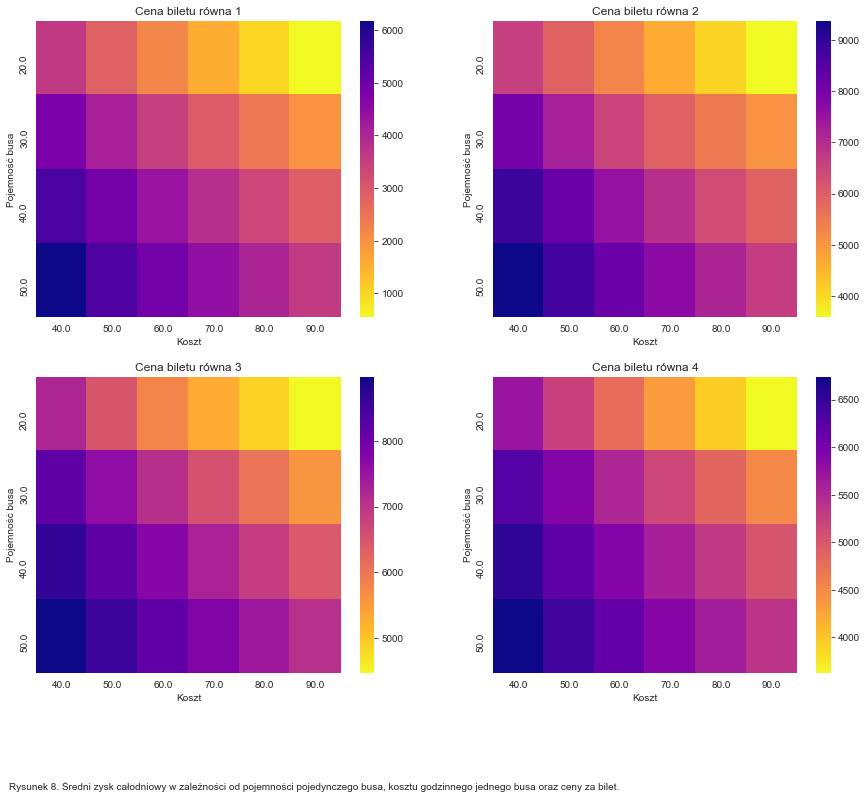

In [37]:
fig2, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(data_profits_1[i+1], cmap=cm.plasma_r, ax=ax)
    ax.set_title(f"Cena biletu równa {i+1}")
    if i > 4:
        ax.get_xaxis().set_visible(False)
fig2.text(.1, -0.01, "Rysunek 8. Średni zysk całodniowy w zależności od pojemności pojedynczego busa, kosztu godzinnego jednego busa oraz ceny za bilet.", ha='left')        
plt.show();

Z powyższych wykresów wynikają dość naturalne wnioski. W pierwszej kolejności średni zysk dobowy rośnie wraz ze wzrostem ceny do pewnego momentu, do ceny równej 2 zł. W każdym z przedstawionych powyżej wykresów średni zysk rośnie wraz ze spadkiem kosztu autobusu za godzinę użytkowania. Odwrotna zależność ma miejsce z pojemnością busa. Wraz ze wzrostem pojemności busa nasze średnie zyski rosną. Pojemność busa niweluje godzinny koszt autobusu. Przykładowo we wszystkich wykresach średnie zyski są podobne dla dwóch zestawów parametrów: koszt autobusu równa się 80, a pojemność 50 daje podobne średnie zyski co zestaw parametrów: koszt równy 50, a pojemność busa równa się 30. W następnej kolejności zostanie przedstawiony wykres najczęstej optymalnej liczby busów na daną godzinę w zależności od pojemności busa, przyjmując maksymalną liczbę busów równą 6.

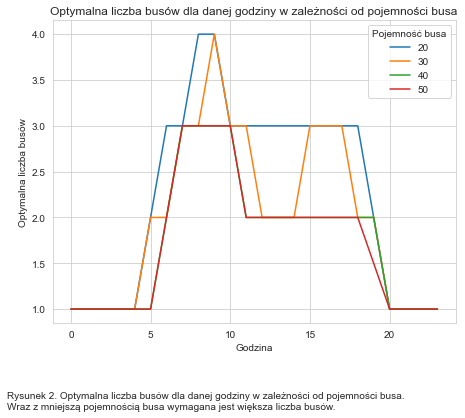

In [38]:
dfs_grouped = {}
for cap in capacity:
    df = data[(data["Maksymalna liczba busów"]==6) & (data['Pojemność busa']==cap)]
    grouped = df.groupby(['Godzina'])['Optymalna liczba'].median().reset_index()
    dfs_grouped[cap] = grouped
fig1 = plt.figure(figsize=(7, 6))
ax1 = fig1.add_axes((0.1, 0.2, 0.8, 0.7))
for cap in capacity:
    ax1.plot(dfs_grouped[cap]['Godzina'], dfs_grouped[cap]['Optymalna liczba'], label=cap)
ax1.legend(loc=1, title='Pojemność busa')
plt.ylabel('Optymalna liczba busów')
plt.xlabel('Godzina')
plt.title('Optymalna liczba busów dla danej godziny w zależności od pojemności busa')
fig1.text(.01, .001, 
          "Rysunek 2. Optymalna liczba busów dla danej godziny w zależności od pojemności busa. \n"
          "Wraz z mniejszą pojemnością busa wymagana jest większa liczba busów.");

Na podstawie powyższego wykresu możemy dojść do ciekawych wniosków. Przykładowo, optymalna liczba busów jest najwyższa gdy mamy najniższą pojemność busa dla wszystkich godzin. Zasadniczo, najwięcej busów firma Wesoły Autobus powinna wypuszczać w godzinach między 8 a 10 dla każdej wersji pojemności busa. 

Z powyższego wykresu wynika, że najczęstsza optymalna liczba narzędzi to 3. Co ciekawe, podobnie często występującym rozwiązaniem optymalnym była liczba 2. Powyższy wykres dla układu gniazdowego również sugeruje, że wraz z większym kosztem przestoju maszyny optymalna liczba narzędzi jest wyższa dla danego kosztu zestawu. W celu pogłębionej analizy problemu optymalnej liczby narzędzi została podjęta próba utworzenia drzewa decyzyjnego.  

 W celu pogłębionej analizy problemu optymalnej liczby busów została podjęta próba utworzenia drzewa decyzyjnego. Zmiennymi objaśnianymi zostały wybrane parametry takie jak cena biletu, pojemność busa, maksymalna liczba busów oraz godzina kursu.

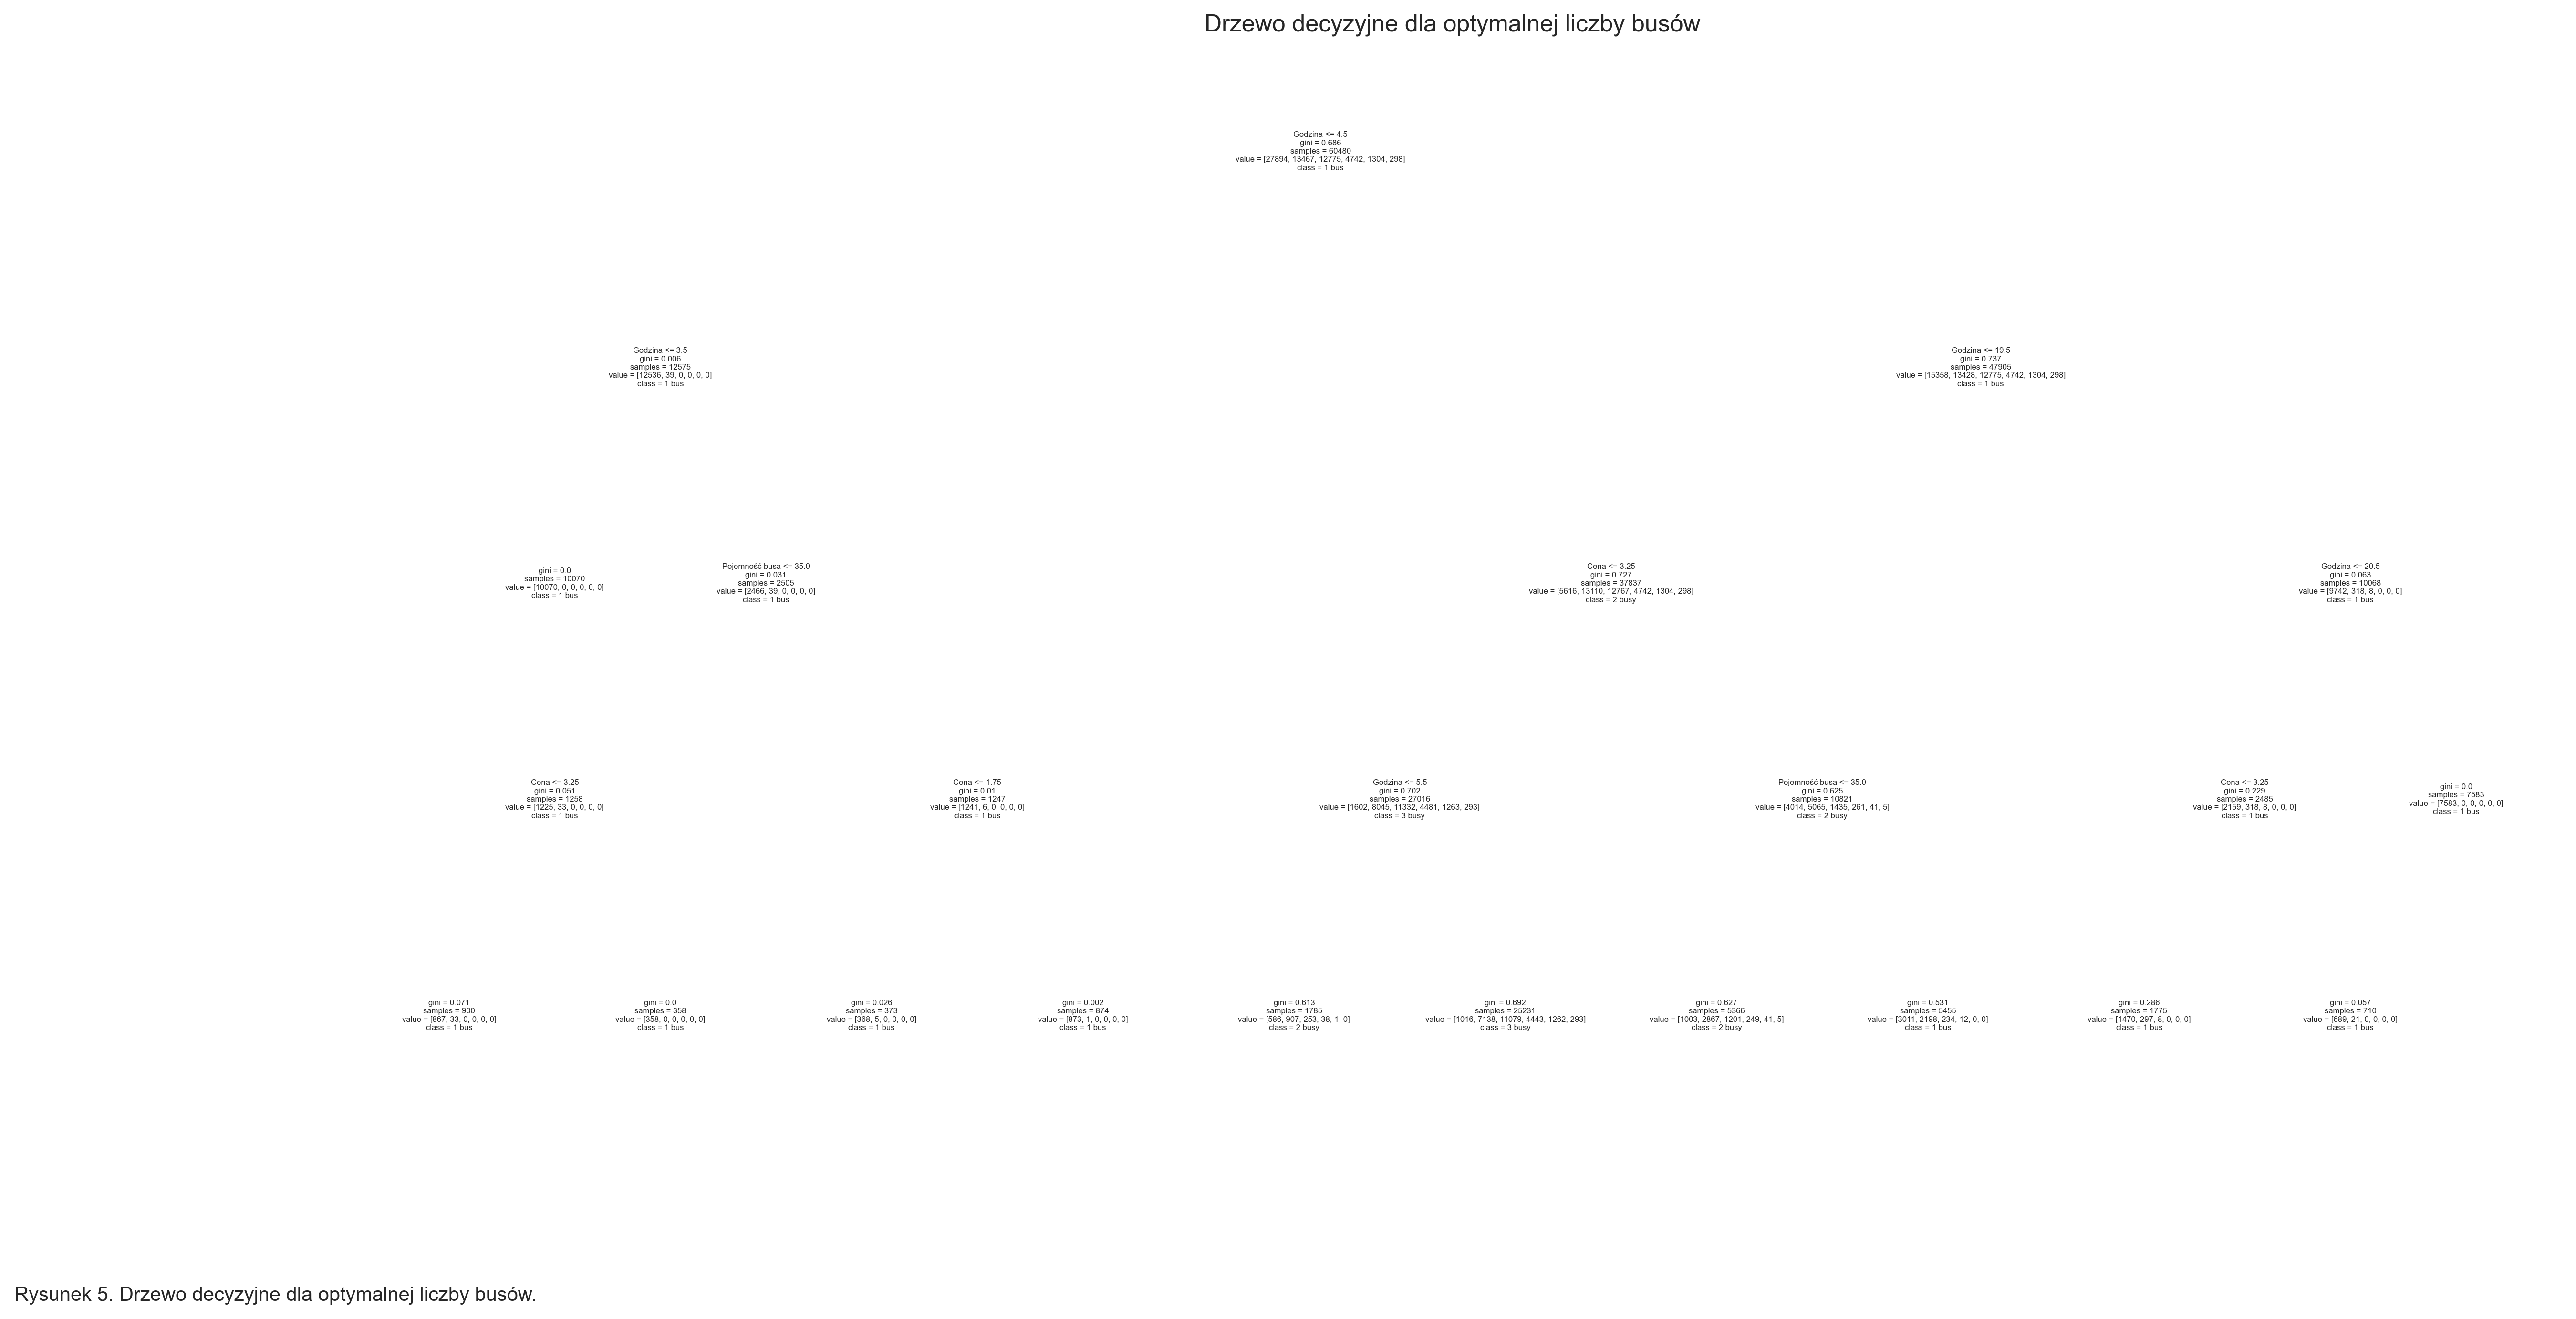

In [60]:
# d = {'L': 0, 'G': 1}
# grouped['Ustawienie'] = grouped['Ustawienie'].map(d)
features = ["Cena", 'Pojemność busa', "Godzina"]
# X = grouped[features]
# y = grouped["Liczba narzedzi"]
X_train, X_test, Y_train, Y_test = train_test_split(data[features], data["Optymalna liczba"], random_state=0)
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree = dtree.fit(X_train, Y_train)
score = dtree.score(X_test, Y_test)
fig, axes = plt.subplots(figsize = (20,10), dpi=300)
tree.plot_tree(dtree, feature_names=features,
              class_names=['1 bus', '2 busy', '3 busy', '4 busy', '5 busów', '6 busów'],
              fontsize=4)
plt.title('Drzewo decyzyjne dla optymalnej liczby busów')
fig.text(.01, .001, 
          "Rysunek 5. Drzewo decyzyjne dla optymalnej liczby busów.")
fig.savefig('tree.png')

W pierwszej kolejności zestaw danych został podzielony na zbiór uczący (75 % pierwotnego zbioru) oraz testowy (25 % pierwotnego zbioru). Następnie został utworzony model drzewa decyzyjnego z maksymalną głebokością korzeni równą 6, aby model nie został zbyt przeuczony. Na powyższym wykresie jest zwizualizowane drzewo decyzyjyne. Nie jest ono zbyt czytelne w jupyter notebooku, więc zostało zapisane do oddzielnego pliku. Takie drzewo decyzyjne będzie pomocne dla przedsiębiorstwa w kwestii podjęcia dezycji odnośnie optymalnej liczby busa na daną godzinę w zależności od innych parametrów. Zostanie przedstawiona jedna wybrana reguła z powyższego drzewa: jeżeli cena biletu jest mniejsza niż 3.25 w godzinie między 5:30 a 19:30 liczba busów powinna zostać ustalona na poziomie 3.